In [1]:
import numpy as np

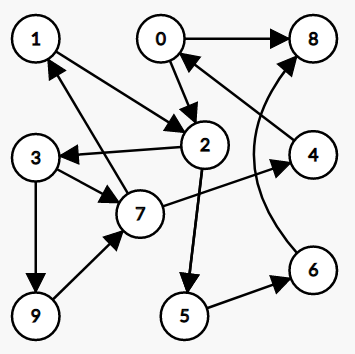


In [105]:
L = np.zeros((10, 10))
L[2,0] = 1; L[8,0] = 1
L[2,1] = 1;
L[5,2] = 1; L[3,2] = 1
L[7,3] = 1; L[9,3] = 1
L[0,4] = 1;
L[6,5] = 1;
L[8,6] = 1;
L[4,7] = 1;
L[7,9] = 1;

print(L)


[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [106]:
n = len(L) 
for i in range(n):
    count = np.sum(L[:,i])
    if count == 0:
        L[:,i] = 1/n
    else:
        for k in range(n):
            L[k,i] /= count
print(L, end='\n\n')

b = 0.75 #[0;1]
D = b*L + (1-b) * np.ones((n, n)) / n
print(D)

[[0.  0.  0.  0.  1.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.5 1.  0.  0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  0.  0.  1.  0.1 0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.1 0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.1 1. ]
 [0.5 0.  0.  0.  0.  0.  1.  0.  0.1 0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.1 0. ]]

[[0.025 0.025 0.025 0.025 0.775 0.025 0.025 0.025 0.1   0.025]
 [0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.1   0.025]
 [0.4   0.775 0.025 0.025 0.025 0.025 0.025 0.025 0.1   0.025]
 [0.025 0.025 0.4   0.025 0.025 0.025 0.025 0.025 0.1   0.025]
 [0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.775 0.1   0.025]
 [0.025 0.025 0.4   0.025 0.025 0.025 0.025 0.025 0.1   0.025]
 [0.025 0.025 0.025 0.025 0.025 0.775 0.025 0.025 0.1   0.025]
 [0.025 0.025 0.025 0.4   0.025 0.025 0.025 0.025 0.1   0.775]
 [0.4   0.025 0.025 0.025 0.025 0.025 0.775 0.025 0.1   0.025]
 

In [134]:
s, v = np.linalg.eig(L)

print(s, end='\n\n\n')
print(np.sort(v[:,0]),end='\n\n\n')
print(np.sort(L @ v[:,0]),end='\n\n\n')


a = np.array((list(range(10)), list(abs(v[:,0])))).T
print(a)

[ 1.00000000e+00+0.00000000e+00j  3.20810571e-01+6.82984280e-01j
  3.20810571e-01-6.82984280e-01j -4.96502829e-01+5.24841597e-01j
 -4.96502829e-01-5.24841597e-01j -6.07157915e-01+0.00000000e+00j
  2.92712150e-02+3.71059866e-01j  2.92712150e-02-3.71059866e-01j
  2.53370019e-16+1.53571906e-08j  2.53370019e-16-1.53571906e-08j]


[0.05330018+0.j 0.15990054+0.j 0.21320072+0.j 0.21320072+0.j
 0.2665009 +0.j 0.31980107+0.j 0.31980107+0.j 0.37310125+0.j
 0.42640143+0.j 0.53300179+0.j]


[0.05330018+0.j 0.15990054+0.j 0.21320072+0.j 0.21320072+0.j
 0.2665009 +0.j 0.31980107+0.j 0.31980107+0.j 0.37310125+0.j
 0.42640143+0.j 0.53300179+0.j]


[[0.         0.42640143]
 [1.         0.05330018]
 [2.         0.31980107]
 [3.         0.21320072]
 [4.         0.37310125]
 [5.         0.21320072]
 [6.         0.2665009 ]
 [7.         0.31980107]
 [8.         0.53300179]
 [9.         0.15990054]]


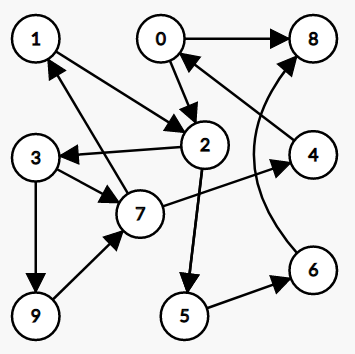


In [166]:
from scipy import sparse
def dataset2csr(filename, nodes, edges):
    rows = []; cols = []
    with open (filename ,'r') as f :
        for line in f.readlines()[4:]:
            o, d = (int(x) -1 for x in line.split())
            rows.append(d)
            cols.append(o)
    return (sparse.csr_matrix(([True] * edges, (rows, cols)), shape = (nodes, nodes)))

l = dataset2csr(filename = 'C:\\Users\\Денис\\Desktop\\вычфиз\\web-Stanford.txt\\web-Stanford.txt',
                nodes = 281903, edges =2312497)

In [214]:
 
n = l.shape[0]
D = scipy.sparse.lil_matrix((n, n), dtype='float')
for i, lnow in enumerate(l):
    print(i)
    
    
    count = np.sum(l[i])
    if count == 0:
        D[i] = 1/n
    else:
        for k in range(n):
            D[k,i] = l[k,i] / count
print(l, end='\n\n')

b = 0.8 #[0;1]
#D = b*L + (1-b) * np.ones((n, n)) / n
#print(D)

def mat(i,j):
    n = 281903
    a = int(l[i,j])
    if np.sum(l[i]) == 0:
        return 1/n
    elif l[i,j]:
        return 0
    else:
        return 1 / np.sum(l[i])

0
1
2
3


KeyboardInterrupt: 

In [215]:
print(np.sum(l))

23173319


In [203]:
print(l[1])
print(l[10, 149992])

  (0, 871)	True
  (0, 1280)	True
  (0, 12093)	True
  (0, 17092)	True
  (0, 17793)	True
  (0, 19146)	True
  (0, 20922)	True
  (0, 25201)	True
  (0, 31701)	True
  (0, 35876)	True
  (0, 52410)	True
  (0, 53624)	True
  (0, 54581)	True
  (0, 59347)	True
  (0, 64929)	True
  (0, 72939)	True
  (0, 73763)	True
  (0, 78294)	True
  (0, 84476)	True
  (0, 98007)	True
  (0, 98627)	True
  (0, 100192)	True
  (0, 102354)	True
  (0, 105317)	True
  (0, 105729)	True
  :	:
  (0, 181864)	True
  (0, 185566)	True
  (0, 190452)	True
  (0, 192782)	True
  (0, 200262)	True
  (0, 204188)	True
  (0, 204603)	True
  (0, 210869)	True
  (0, 213965)	True
  (0, 224288)	True
  (0, 225118)	True
  (0, 228299)	True
  (0, 234602)	True
  (0, 241595)	True
  (0, 243293)	True
  (0, 246896)	True
  (0, 251657)	True
  (0, 252914)	True
  (0, 253991)	True
  (0, 257280)	True
  (0, 259632)	True
  (0, 266554)	True
  (0, 276059)	True
  (0, 278618)	True
  (0, 280934)	True
True


In [223]:
for i in l[:,1]:
    print(i)

  (0, 0)	True


  (0, 0)	True



  (0, 0)	True















  (0, 0)	True

  (0, 0)	True




































  (0, 0)	True


















  (0, 0)	True













  (0, 0)	True









  (0, 0)	True
























  (0, 0)	True







  (0, 0)	True




  (0, 0)	True










  (0, 0)	True








  (0, 0)	True






























  (0, 0)	True

































  (0, 0)	True































  (0, 0)	True




  (0, 0)	True







  (0, 0)	True













  (0, 0)	True



  (0, 0)	True



































  (0, 0)	True




















  (0, 0)	True












  (0, 0)	True

  (0, 0)	True


















  (0, 0)	True















  (0, 0)	True







  (0, 0)	True






















  (0, 0)	True






















  (0, 0)	True







  (0, 0)	True










  (0, 0)	True


































  (0, 0)	True











  (0, 0)	True
  (0, 0)	True
  (0, 0)	True








  (






















































































































































































































































































































































































































































  (0, 0)	True







































































































































































































































































































































































































































































































































































KeyboardInterrupt: 